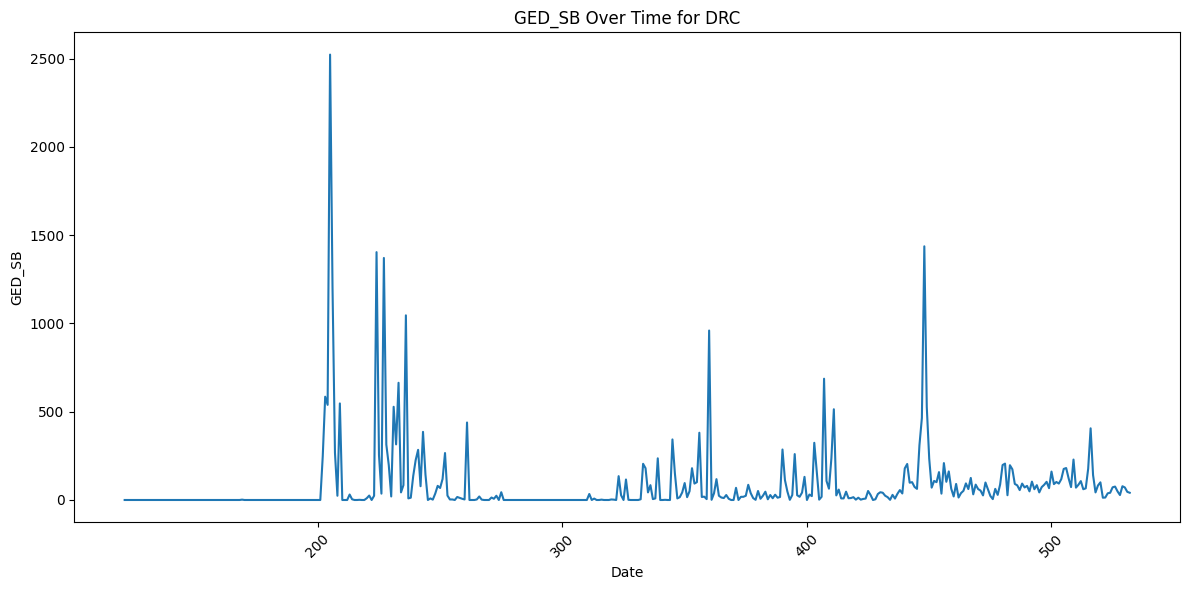

In [3]:
import matplotlib.pyplot as plt
from microprediction import MicroReader
import pandas as pd
import numpy as np

all_history = pd.read_csv('../../data/views/drc.csv')
# history = all_history[['ged_sb']]
history = all_history

window = None
country = "drc"

# Convert the index to datetime if it's not already
# history['date'] = pd.to_datetime(history['month_id'], format='%Y%m')

# Plot ged_sb against month
plt.figure(figsize=(12, 6))
plt.plot(history['month_id'], history['ged_sb'])
plt.title(f'GED_SB Over Time for {country.upper()}')
plt.xlabel('Date')
plt.ylabel('GED_SB')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:

# Calculate variance for each column
variances = history.var()

# Sort columns by variance in descending order and get top 10
top_10_variance = variances.sort_values(ascending=False).head(10)

print("Top 10 columns with highest variance:")
print(top_10_variance)

# Plotting the top 10 high variance columns
plt.figure(figsize=(12, 8))
for column in top_10_variance.index:
    plt.plot(history[column], label=column)

plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Top 10 High Variance Columns for {country}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [34]:
drc_features = [
    'wdi_nv_agr_totl_kn',      # Value added from agriculture in constant local currency
    'wdi_sp_pop_totl',         # Population in total
    'splag_wdi_sm_pop_refg_or', # Refugee population by country or territory of origin
    'splag_wdi_ag_lnd_frst_k2', # Forest area (sq. km)
    'ged_sb'                   # Target variable
]

# Select only the specified features and the target variable
selected_data = history[drc_features]

# Save the selected data to a CSV file
selected_data.to_csv('drc_features.csv', index=False)